In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import surprise as utils
from surprise import KNNBasic, SVD
from surprise.model_selection import cross_validate as CV

In [3]:
ratingsDF = pd.read_csv("ratings_small.csv")
print(ratingsDF.head())
print(ratingsDF.info())

   userId  movieId  rating   timestamp
0       1       31     2.5  1260759144
1       1     1029     3.0  1260759179
2       1     1061     3.0  1260759182
3       1     1129     2.0  1260759185
4       1     1172     4.0  1260759205
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100004 non-null  int64  
 1   movieId    100004 non-null  int64  
 2   rating     100004 non-null  float64
 3   timestamp  100004 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB
None


In [7]:
readObj = utils.Reader(line_format="user item rating timestamp", sep=",", skip_lines=1)
dataset = utils.Dataset.load_from_file("ratings_small.csv", readObj)

In [10]:
# User Based
model_ub = KNNBasic()
result_ub = CV(model_ub, dataset, measures=["mae", "rmse"], cv=5)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.


In [12]:
# Item Based
model_ib = KNNBasic(sim_options={"user_based": False})
result_ib = CV(model_ub, dataset, measures=["mae", "rmse"], cv=5)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.


In [21]:
# PMF
model_pmf = SVD(biased=False)
result_pmf = CV(model_pmf, dataset, measures=["mae", "rmse"], cv=5)

In [37]:
# Summary
print("\t\t  MAE\t   RMSE")
print("User CF:\t{:.5}   {:.5}".format(result_ub['test_mae'].mean(), result_ub['test_rmse'].mean()))
print("Item CF:\t{:.5}   {:.5}".format(result_ib['test_mae'].mean(), result_ib['test_rmse'].mean()))
print("PMF:   \t\t{:.5}   {:.5}".format(result_pmf['test_mae'].mean(), result_pmf['test_rmse'].mean()))


		  MAE	   RMSE
User CF:	0.74347   0.96741
Item CF:	0.74357   0.96804
PMF:   		0.77814   1.0082


In [38]:
# Comparing distance metric for User Base CF
model_ub_cos = KNNBasic(sim_options={"name": "cosine"})
result_ub_cos = CV(model_ub_cos, dataset, measures=["mae", "rmse"], cv=5)

model_ub_msd = KNNBasic(sim_options={"name": "msd"})
result_ub_msd = CV(model_ub_msd, dataset, measures=["mae", "rmse"], cv=5)

model_ub_pb = KNNBasic(sim_options={"name": "pearson_baseline"})
result_ub_pb = CV(model_ub_pb, dataset, measures=["mae", "rmse"], cv=5)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases usi

		  MAE	   RMSE
Cosine:		0.76755   0.99395
MSD:		0.74418   0.96825
Pearson:   	0.76853   0.9955


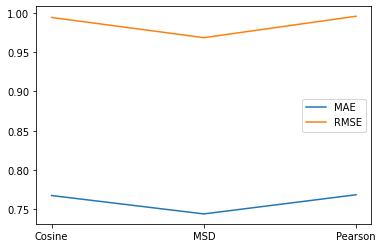

In [52]:
# Summary distance metric comparison
plt.clf()
print("\t\t  MAE\t   RMSE")
print("Cosine:\t\t{:.5}   {:.5}".format(result_ub_cos['test_mae'].mean(), result_ub_cos['test_rmse'].mean()))
print("MSD:\t\t{:.5}   {:.5}".format(result_ub_msd['test_mae'].mean(), result_ub_msd['test_rmse'].mean()))
print("Pearson:   \t{:.5}   {:.5}".format(result_ub_pb['test_mae'].mean(), result_ub_pb['test_rmse'].mean()))

mae = [result_ub_cos['test_mae'].mean(), result_ub_msd['test_mae'].mean(), result_ub_pb['test_mae'].mean()]
rmse = [result_ub_cos['test_rmse'].mean(), result_ub_msd['test_rmse'].mean(), result_ub_pb['test_rmse'].mean()]
x_labels = ["Cosine", "MSD", "Pearson"]
# plt.legend(["mae", "rmse"])
plt.plot(x_labels, mae, label='MAE')
plt.plot(x_labels, rmse, label='RMSE')
plt.legend(["MAE", "RMSE"])
plt.show()

In [44]:
# Comparing distance metric for Item Base CF
model_ib_cos = KNNBasic(sim_options={"name": "cosine", "user_based": False})
result_ib_cos = CV(model_ib_cos, dataset, measures=["mae", "rmse"], cv=5)

model_ib_msd = KNNBasic(sim_options={"name": "msd", "user_based": False})
result_ib_msd = CV(model_ib_msd, dataset, measures=["mae", "rmse"], cv=5)

model_ib_pb = KNNBasic(sim_options={"name": "pearson_baseline", "user_based": False})
result_ib_pb = CV(model_ib_pb, dataset, measures=["mae", "rmse"], cv=5)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases usi

		  MAE	   RMSE
Cosine:		0.7747   0.99499
MSD:		0.72088   0.93479
Pearson:   	0.71306   0.94104


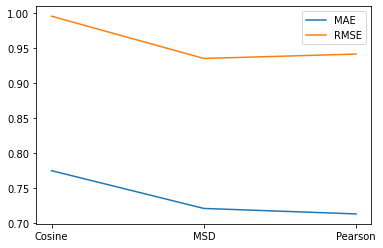

In [51]:
# Summary distance metric comparison
plt.clf()
print("\t\t  MAE\t   RMSE")
print("Cosine:\t\t{:.5}   {:.5}".format(result_ib_cos['test_mae'].mean(), result_ib_cos['test_rmse'].mean()))
print("MSD:\t\t{:.5}   {:.5}".format(result_ib_msd['test_mae'].mean(), result_ib_msd['test_rmse'].mean()))
print("Pearson:   \t{:.5}   {:.5}".format(result_ib_pb['test_mae'].mean(), result_ib_pb['test_rmse'].mean()))

mae = [result_ib_cos['test_mae'].mean(), result_ib_msd['test_mae'].mean(), result_ib_pb['test_mae'].mean()]
rmse = [result_ib_cos['test_rmse'].mean(), result_ib_msd['test_rmse'].mean(), result_ib_pb['test_rmse'].mean()]
x_labels = ["Cosine", "MSD", "Pearson"]
# plt.legend(["mae", "rmse"])
plt.plot(x_labels, mae, label="MAE")
plt.plot(x_labels, rmse, label="RMSE")
plt.legend(["MAE", "RMSE"])
plt.show()

In [62]:
# Best K Finder for user based
kVals = list(range(0, 101, 5))
kVals[0] = 1
resK_ub = []

for k in kVals:
    print("-" * 10, " K = {} ".format(k), "-" * 10)
    modelObj = KNNBasic(k, verbose=False)
    resK_ub.append(CV(modelObj, dataset, measures=["rmse"], cv=5))
    

----------  K = 1  ----------
----------  K = 5  ----------
----------  K = 10  ----------
----------  K = 15  ----------
----------  K = 20  ----------
----------  K = 25  ----------
----------  K = 30  ----------
----------  K = 35  ----------
----------  K = 40  ----------
----------  K = 45  ----------
----------  K = 50  ----------
----------  K = 55  ----------
----------  K = 60  ----------
----------  K = 65  ----------
----------  K = 70  ----------
----------  K = 75  ----------
----------  K = 80  ----------
----------  K = 85  ----------
----------  K = 90  ----------
----------  K = 95  ----------
----------  K = 100  ----------


In [64]:
# Best K Finder for item based
kVals = list(range(0, 101, 5))
kVals[0] = 1
resK_ib = []

for k in kVals:
    print("-" * 10, " K = {} ".format(k), "-" * 10)
    modelObj = KNNBasic(k, sim_options={"user_based": False}, verbose=False)
    resK_ib.append(CV(modelObj, dataset, measures=["rmse"], cv=5))
    

----------  K = 1  ----------
----------  K = 5  ----------
----------  K = 10  ----------
----------  K = 15  ----------
----------  K = 20  ----------
----------  K = 25  ----------
----------  K = 30  ----------
----------  K = 35  ----------
----------  K = 40  ----------
----------  K = 45  ----------
----------  K = 50  ----------
----------  K = 55  ----------
----------  K = 60  ----------
----------  K = 65  ----------
----------  K = 70  ----------
----------  K = 75  ----------
----------  K = 80  ----------
----------  K = 85  ----------
----------  K = 90  ----------
----------  K = 95  ----------
----------  K = 100  ----------


[1.210925711944538, 0.9863170846767059, 0.9660151914180224, 0.9614118576995005, 0.9621418551444381, 0.9622452952035122, 0.9639084534672607, 0.9657644948505852, 0.9683952514088621, 0.9677327636287021, 0.9699330067832749, 0.9718640093912813, 0.972257834841578, 0.9726838251866227, 0.9730820213096475, 0.9733873169344893, 0.9739984309084806, 0.9738552698652061, 0.9756929207449112, 0.9758653581324239, 0.9753458288515446]


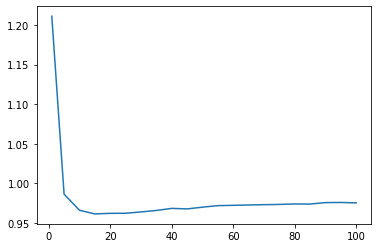

In [65]:
# Plot k vs RMSE for user base
plt.clf()
ub = [item["test_rmse"].mean() for item in resK_ub]
print(ub)
plt.plot(kVals, ub)
plt.show()

[1.3030468680129952, 1.0255956093782372, 0.9752164648644767, 0.9563378999862413, 0.9470092843563375, 0.9422448159371385, 0.9392689608925717, 0.9372909484365209, 0.9350673992179782, 0.934151706527578, 0.9345491116014738, 0.9330661961504255, 0.9319452537600279, 0.9322877202217035, 0.9309031025590361, 0.931361840700825, 0.9316904230303447, 0.9318632567857821, 0.9318733090399608, 0.9320678486533961, 0.9314292404140112]


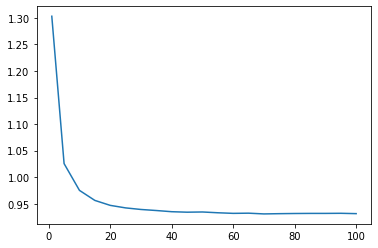

In [67]:
# Plot k vs RMSE for item base
plt.clf()
ib = [item["test_rmse"].mean() for item in resK_ib]
print(ib)
plt.plot(kVals, ub)
plt.show()

In [71]:
# Minimum RMSE on what K values
minK_ub = ub.index(min(ub)) * 5
minK_ib = ib.index(min(ib)) * 5

print("Item Based CF: Best results at K = {}".format(minK_ib))
print("User Based CF: Best results at K = {}".format(minK_ub))

Item Based CF: Best results at K = 70
User Based CF: Best results at K = 15
